In [270]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, LassoCV
import xgboost as xgb

pd.set_option('display.max_columns', None)

In [271]:
# Load the dataset
data = pd.read_excel("Data/Telco_customer_churn.xlsx")

# Display first few rows
data.head(5)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [272]:
data = data.drop(['CustomerID',	'Count', 'Country', 'State', 'Lat Long', 'Latitude', 'Longitude', 'Churn Score', 'Churn Reason', 'Churn Label'], axis = 1)

In [273]:
data.isna().sum()

City                 0
Zip Code             0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Value          0
CLTV                 0
dtype: int64

In [274]:
data.duplicated().sum()

np.int64(0)

In [275]:
#Replace blank entries (' ') with NaN
data['Total Charges'] = data['Total Charges'].replace(' ', np.nan)

# Step 2: Convert the column to numeric
data['Total Charges'] = pd.to_numeric(data['Total Charges'])

# Step 3: Replace NaN with the median
median_value = data['Total Charges'].median()
data['Total Charges'].fillna(median_value, inplace=True)

C:\Users\viren\AppData\Local\Temp\ipykernel_19988\3600933469.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Total Charges'] = data['Total Charges'].replace(' ', np.nan)
C:\Users\viren\AppData\Local\Temp\ipykernel_19988\3600933469.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['T

In [276]:
data.head(5)

,City,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV
0,Los Angeles,90003,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,3239
1,Los Angeles,90005,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,2701
2,Los Angeles,90006,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,5372
3,Los Angeles,90010,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,5003
4,Los Angeles,90015,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,5340


C:\Users\viren\AppData\Local\Temp\ipykernel_19988\92465095.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette="viridis")


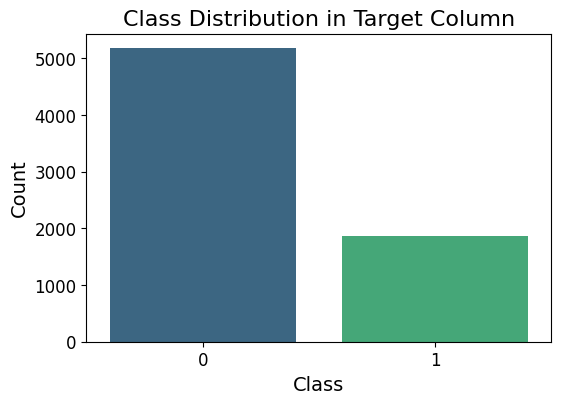

In [277]:
target_counts = data['Churn Value'].value_counts()

# Plot the bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts.index, y=target_counts.values, palette="viridis")

# Add labels and title
plt.title('Class Distribution in Target Column', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

In [278]:
x = data.drop(['Churn Value'], axis = 1)
y = data[['Churn Value']]

### Data transformation

In [279]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cols_one_hot = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service',
                'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
                'Contract', 'Paperless Billing', 'Payment Method']

# Define the column transformer
column_transformer = ColumnTransformer(
    transformers=[
        ('', OneHotEncoder(), cols_one_hot)
    ],
    remainder='passthrough'  # Leave other columns as-is
)

# Apply the transformation
transformed = column_transformer.fit_transform(x)

# Get feature names without the 'remainder__' prefix
new_columns = column_transformer.get_feature_names_out()
new_columns = [col.replace('remainder__', '') for col in new_columns]
new_columns = [col.replace('__', '') for col in new_columns]

# Convert to a dense DataFrame
x = pd.DataFrame(transformed, columns=new_columns)

In [280]:
# Define the categories for ordinal encoding (if ordering matters)
from sklearn.preprocessing import OrdinalEncoder

cols_one_hot = ['City', 'Zip Code']

# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the data
x[cols_one_hot] = ordinal_encoder.fit_transform(x[cols_one_hot])

### Resampling

In [281]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

print("After Oversampling:", y_resampled.value_counts())

After Oversampling: Churn Value
0              5174
1              5174
Name: count, dtype: int64


In [282]:
# from imblearn.under_sampling import RandomUnderSampler

# undersampler = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = undersampler.fit_resample(x, y)

# print("After Undersampling:", y_resampled.value_counts())

### Data splitting

In [283]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [284]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8278, 49)
(2070, 49)
(8278, 1)
(2070, 1)


In [285]:
from sklearn.preprocessing import MinMaxScaler

transform_cols = ['Tenure Months', 'Monthly Charges',	'Total Charges',	'CLTV']

# Initialize RobustScaler
scaler = MinMaxScaler()

# Fit on X_train and transform X_train
x_train[transform_cols] = scaler.fit_transform(x_train[transform_cols])
x_test[transform_cols] = scaler.transform(x_test[transform_cols])

In [286]:
# Convert all object columns to numeric
x_train = x_train.apply(pd.to_numeric, errors='coerce')
x_test = x_test.apply(pd.to_numeric, errors='coerce')
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

##### Feature selection

In [287]:
# Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(x_train, y_train)
rf_pred = random_forest.predict(x_test)

print("Random Forest:")
print(classification_report(y_test, rf_pred))

Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1015
           1       0.89      0.84      0.87      1055

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070



In [288]:
# Make predictions
prob_pred = random_forest.predict_proba(x_test)

In [289]:
prob_pred

array([[0.05, 0.95],
       [0.97, 0.03],
       [0.54, 0.46],
       ...,
       [0.39, 0.61],
       [0.95, 0.05],
       [0.03, 0.97]])

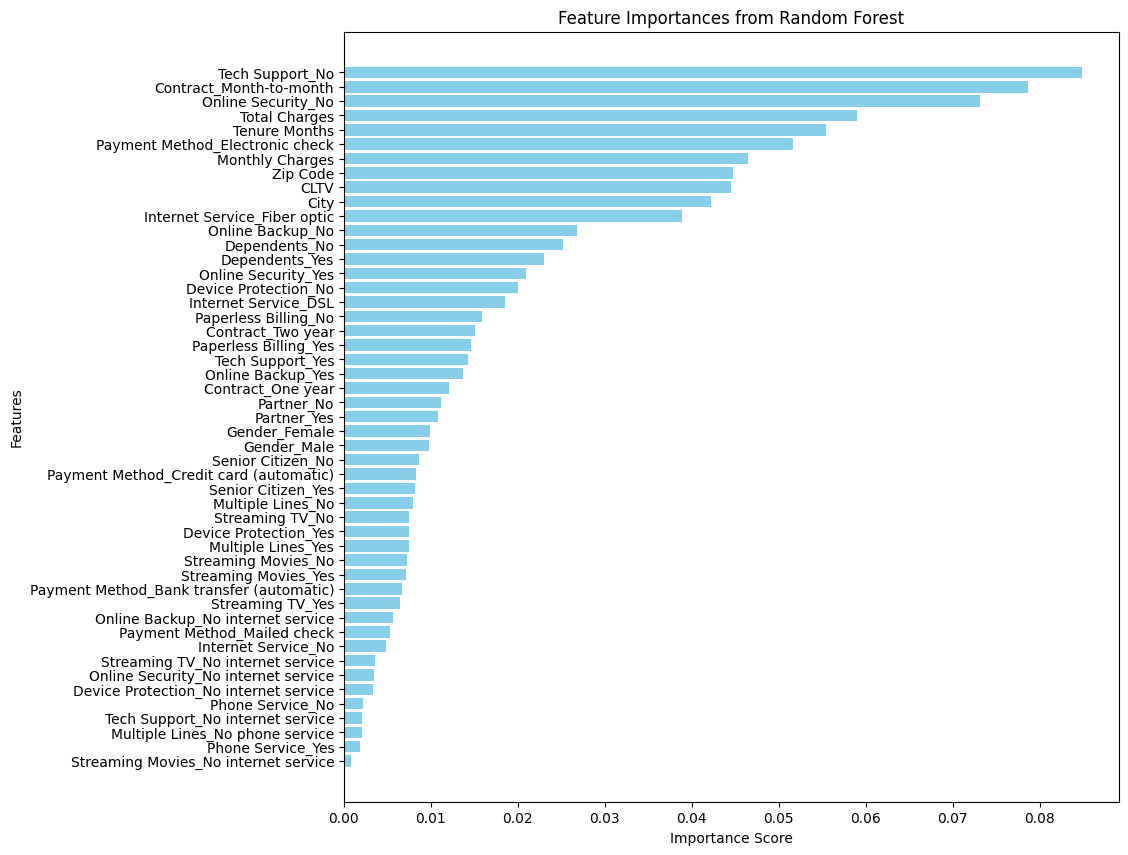

In [290]:
# Extract Feature Importances
feature_importances = random_forest.feature_importances_

# Get feature names
feature_names = x_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the Feature Importances
plt.figure(figsize=(10, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest importance at the top
plt.show()

### Training

##### Lasso

In [291]:
# # Define the model
# from sklearn.metrics import accuracy_score
# score_list = []
# params = []

# C_list = [0.01, 0.1, 1, 10, 100]
# iter_list = [100, 200, 500] 

# for i in C_list:
#     for j in iter_list:
#         lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, C = i, max_iter = j)
#         lasso.fit(x_train, y_train)
#         lasso_pred = lasso.predict(x_test)

#         accuracy = accuracy_score(y_test, lasso_pred)
#         score_list.append(accuracy)
#         params.append([i, j])

# # Find the index of the highest number
# max_index = score_list.index(max(score_list))
# best_params = params[max_index]

# print(f"The highest accuracy is: {score_list[max_index]} for params: {best_params}")

In [292]:
# Lasso Regression (Logistic Regression with L1 Penalty)
lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, C = 1, max_iter = 100)
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_test)

print("Lasso Regression:")
print(classification_report(y_test, lasso_pred))

Lasso Regression:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1015
           1       0.78      0.82      0.80      1055

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



##### Ridge

In [293]:
# score_list = []
# params = []

# alpha = [0.01, 0.1, 1, 10, 100]
# solver = ['auto', 'sag', 'saga']
# tol = [1e-4, 1e-3, 1e-2]
# max_iter = [100, 500, 1000]

# for i in alpha:
#     for j in solver:
#         for k in tol:
#             for l in max_iter:
#                 ridge = RidgeClassifier(random_state=42, alpha = i, solver=j, tol=k, max_iter=l)
#                 ridge.fit(x_train, y_train)
#                 ridge_pred = ridge.predict(x_test)

#                 accuracy = accuracy_score(y_test, ridge_pred)
#                 score_list.append(accuracy)
#                 params.append([i, j, k, l])

# # Find the index of the highest number
# max_index = score_list.index(max(score_list))
# best_params = params[max_index]

# print(f"The highest accuracy is: {score_list[max_index]} for params: {best_params}")

In [294]:
# Ridge Regression (RidgeClassifier)
ridge = ridge = RidgeClassifier(random_state=42, alpha = 1, solver='auto', tol=0.0001, max_iter=100)
ridge.fit(x_train, y_train)
ridge_pred = ridge.predict(x_test)

print("Ridge Regression:")
print(classification_report(y_test, ridge_pred))

Ridge Regression:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1015
           1       0.78      0.83      0.80      1055

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



##### SVM

In [295]:
# score_list = []
# params = []

# C_list = [0.01, 0.1, 1, 10, 100]
# tol = [1e-4, 1e-3, 1e-2]
# iter_list = [100, 200, 500] 

# for i in C_list:
#     for j in tol:
#         for k in iter_list:
#             svm = SVC(kernel='linear', random_state=42, C=i, tol=j, max_iter=k)
#             svm.fit(x_train, y_train)
#             svm_pred = svm.predict(x_test)

#             accuracy = accuracy_score(y_test, svm_pred)
#             score_list.append(accuracy)
#             params.append([i, j, k])

# # Find the index of the highest number
# max_index = score_list.index(max(score_list))
# best_params = params[max_index]

# print(f"The highest accuracy is: {score_list[max_index]} for params: {best_params}")

In [296]:
# Support Vector Machine
svm = SVC(kernel='linear', random_state=42, C=10, tol=0.0001, max_iter=100)
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)

print("Support Vector Machine:")
print(classification_report(y_test, svm_pred))

Support Vector Machine:
              precision    recall  f1-score   support

           0       0.49      0.49      0.49      1015
           1       0.51      0.52      0.51      1055

    accuracy                           0.50      2070
   macro avg       0.50      0.50      0.50      2070
weighted avg       0.50      0.50      0.50      2070



c:\Users\viren\Portfolio\Customer churn\.conda\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


##### KNN

In [297]:
# score_list = []
# params = []

# n_neighbors = range(1,31)
# weights = ['uniform', 'distance']
# metric = ['minkowski', 'euclidean', 'manhattan']

# for i in n_neighbors:
#     for j in weights:
#         for k in metric:
#             knn = KNeighborsClassifier(n_neighbors=i, weights=j, metric=k)
#             knn.fit(x_train, y_train)
#             knn_pred = knn.predict(x_test)

#             accuracy = accuracy_score(y_test, knn_pred)
#             score_list.append(accuracy)
#             params.append([i, j, k])

# # Find the index of the highest number
# max_index = score_list.index(max(score_list))
# best_params = params[max_index]

# print(f"The highest accuracy is: {score_list[max_index]} for params: {best_params}")

In [298]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=18, weights='distance', metric='manhattan')
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

print("K-Nearest Neighbors:")
print(classification_report(y_test, knn_pred))

K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      1015
           1       0.74      0.68      0.71      1055

    accuracy                           0.72      2070
   macro avg       0.72      0.72      0.72      2070
weighted avg       0.72      0.72      0.72      2070



##### DT

In [299]:
# score_list = []
# params = []

# max_depth = [3, 5, 10, 20, 30, None]
# min_samples_split = [2, 5, 10, 20]
# min_samples_leaf = [1, 5, 10, 20]
# max_features = ['sqrt', 'log2', None]
# criterion = ['gini', 'entropy']

# for i in max_depth:
#     for j in min_samples_split:
#         for k in min_samples_leaf:
#             for l in max_features:
#                 for m in criterion:
#                     decision_tree = DecisionTreeClassifier(random_state=42, max_depth=i, min_samples_split=j, min_samples_leaf=k, max_features=l, criterion=m)
#                     decision_tree.fit(x_train, y_train)
#                     dt_pred = decision_tree.predict(x_test)

#                     accuracy = accuracy_score(y_test, dt_pred)
#                     score_list.append(accuracy)
#                     params.append([i, j, k, l, m])

# # Find the index of the highest number
# max_index = score_list.index(max(score_list))
# best_params = params[max_index]

# print(f"The highest accuracy is: {score_list[max_index]} for params: {best_params}")

In [300]:
# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=20, min_samples_leaf=5, max_features='log2', criterion='entropy')
decision_tree.fit(x_train, y_train)
dt_pred = decision_tree.predict(x_test)

print("Decision Trees:")
print(classification_report(y_test, dt_pred))

Decision Trees:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1015
           1       0.85      0.84      0.85      1055

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



##### RF

In [301]:
# score_list = []
# params = []

# n_estimators = [50, 100, 200, 300, 400, 500]
# max_depth = [5, 10, 20, 30, 50, None]
# min_samples_split = [2, 5, 10, 20, 30]
# min_samples_leaf = [1, 5, 10, 20, 30]
# max_features = ['sqrt', 'log2', None]
# criterion = ['gini', 'entropy']

# for n in n_estimators:
#     for i in max_depth:
#         for j in min_samples_split:
#             for k in min_samples_leaf:
#                 for l in max_features:
#                     for m in criterion:
#                         random_forest = RandomForestClassifier(n_estimators = n, random_state=42, max_depth=i, min_samples_split=j, min_samples_leaf=k, max_features=l, criterion=m)
#                         random_forest.fit(x_train, y_train)
#                         rf_pred = random_forest.predict(x_test)

#                         accuracy = accuracy_score(y_test, rf_pred)
#                         score_list.append(accuracy)
#                         params.append([n, i, j, k, l, m])

# # Find the index of the highest number
# max_index = score_list.index(max(score_list))
# best_params = params[max_index]

# print(f"The highest accuracy is: {score_list[max_index]} for params: {best_params}")

In [302]:
# Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(x_train, y_train)
rf_pred = random_forest.predict(x_test)

print("Random Forest:")
print(classification_report(y_test, rf_pred))

Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1015
           1       0.89      0.84      0.87      1055

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070



##### XGB

In [303]:
# score_list = []
# params = []

# n_estimators = [20, 50, 100, 200]
# learning_rate = [0.01, 0.05, 0.1]
# max_depth = [10, 30, 50, None]
# gamma = [0, 0.1, 0.3]
# reg_alpha = [0, 0.1, 1]
# reg_lambda = [1, 10]

# for n in n_estimators:
#     for i in learning_rate:
#         for j in max_depth:
#                 xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_estimators=n, learning_rate=i, max_depth=j)
#                 xgb_model.fit(x_train, y_train)
#                 xgb_pred = xgb_model.predict(x_test)

#                 accuracy = accuracy_score(y_test, xgb_pred)
#                 score_list.append(accuracy)
#                 params.append([n, i, j])

# # Find the index of the highest number
# max_index = score_list.index(max(score_list))
# best_params = params[max_index]

# print(f"The highest accuracy is: {score_list[max_index]} for params: {best_params}")

In [383]:
# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_estimators=50, learning_rate=0.1, max_depth=10)
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)

print("XGBoost:")
print(classification_report(y_test, xgb_pred))

c:\Users\viren\Portfolio\Customer churn\.conda\lib\site-packages\xgboost\core.py:158: UserWarning: [20:57:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1015
           1       0.88      0.86      0.87      1055

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070



#### Create churn score

In [384]:
x = data.drop(['Churn Value'], axis = 1)
y = data[['Churn Value']]

In [385]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cols_one_hot = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service',
                'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
                'Contract', 'Paperless Billing', 'Payment Method']

# Define the column transformer
column_transformer = ColumnTransformer(
    transformers=[
        ('', OneHotEncoder(), cols_one_hot)
    ],
    remainder='passthrough'  # Leave other columns as-is
)

# Apply the transformation
transformed = column_transformer.fit_transform(x)

# Get feature names without the 'remainder__' prefix
new_columns = column_transformer.get_feature_names_out()
new_columns = [col.replace('remainder__', '') for col in new_columns]
new_columns = [col.replace('__', '') for col in new_columns]

# Convert to a dense DataFrame
x = pd.DataFrame(transformed, columns=new_columns)

In [386]:
# Define the categories for ordinal encoding (if ordering matters)
from sklearn.preprocessing import OrdinalEncoder

cols_one_hot = ['City', 'Zip Code']

# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the data
x[cols_one_hot] = ordinal_encoder.fit_transform(x[cols_one_hot])

In [387]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

print("After Oversampling:", y_resampled.value_counts())

After Oversampling: Churn Value
0              5174
1              5174
Name: count, dtype: int64


In [388]:
print(x.shape)
print(y.shape)

(7043, 49)
(7043, 1)


In [389]:
from sklearn.preprocessing import MinMaxScaler

transform_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV']

# Initialize RobustScaler
scaler = MinMaxScaler()

# Fit on X_train and transform X_train
x[transform_cols] = scaler.fit_transform(x[transform_cols])

In [390]:
# Convert all object columns to numeric
x = x.apply(pd.to_numeric, errors='coerce')
y = y.values.ravel()

In [391]:
x.head(2)

,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,Phone Service_Yes,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Online Security_No,Online Security_No internet service,Online Security_Yes,Online Backup_No,Online Backup_No internet service,Online Backup_Yes,Device Protection_No,Device Protection_No internet service,Device Protection_Yes,Tech Support_No,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,City,Zip Code,Tenure Months,Monthly Charges,Total Charges,CLTV
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,562.0,2.0,0.027778,0.354229,0.01031,0.274850
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,562.0,4.0,0.027778,0.521891,0.01533,0.155215


In [421]:
# Make predictions
pred = random_forest.predict(x)
prob_pred = random_forest.predict_proba(x)

In [422]:
prob_pred.shape

(7043, 2)

In [423]:
prob_pred[20][1]

np.float64(0.37)

In [424]:
prob_pred_list = []
for i in prob_pred:
    prob_pred_list.append(int(round(i[1], 2) * 100))

In [425]:
# Load the dataset
new_data = pd.read_excel("Data/Telco_customer_churn.xlsx")
new_data = new_data.drop(['Count', 'Country', 'Lat Long', 'Churn Score', 'Churn Label'], axis = 1)

In [426]:
new_data['Predicted Labels'] = pred
new_data['Predicted Churn Score'] = prob_pred_list

In [417]:
new_data.head(2)

,State,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV,Churn Reason,Predicted Labels,Predicted Churn Score
0,California,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,3239,Competitor made better offer,1,52
1,California,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,2701,Moved,1,90


In [427]:
print(classification_report(new_data['Churn Value'], new_data['Predicted Labels']))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      5174
           1       0.94      0.91      0.93      1869

    accuracy                           0.96      7043
   macro avg       0.96      0.95      0.95      7043
weighted avg       0.96      0.96      0.96      7043



In [428]:
new_data.to_csv("Data/new_data.csv", index = False)

In [401]:
# Create Tree Explainer object that can calculate shap values
import shap 

explainer = shap.TreeExplainer(random_forest)

In [402]:
explainer.expected_value[1]

np.float64(0.49712007731336083)

In [403]:
# Calculate Shap values
choosen_instance = x.loc[[500]]
shap_values = explainer.shap_values(choosen_instance)

In [404]:
shap_values_list = []
for i in shap_values[0]:
    shap_values_list.append(np.array(float(i[1])))

shap_values_list = np.array(shap_values_list)

In [405]:
explainer.expected_value[1]

np.float64(0.49712007731336083)

In [406]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values_list, choosen_instance)

In [407]:
import shap
# Use SHAP for explainability
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(x)

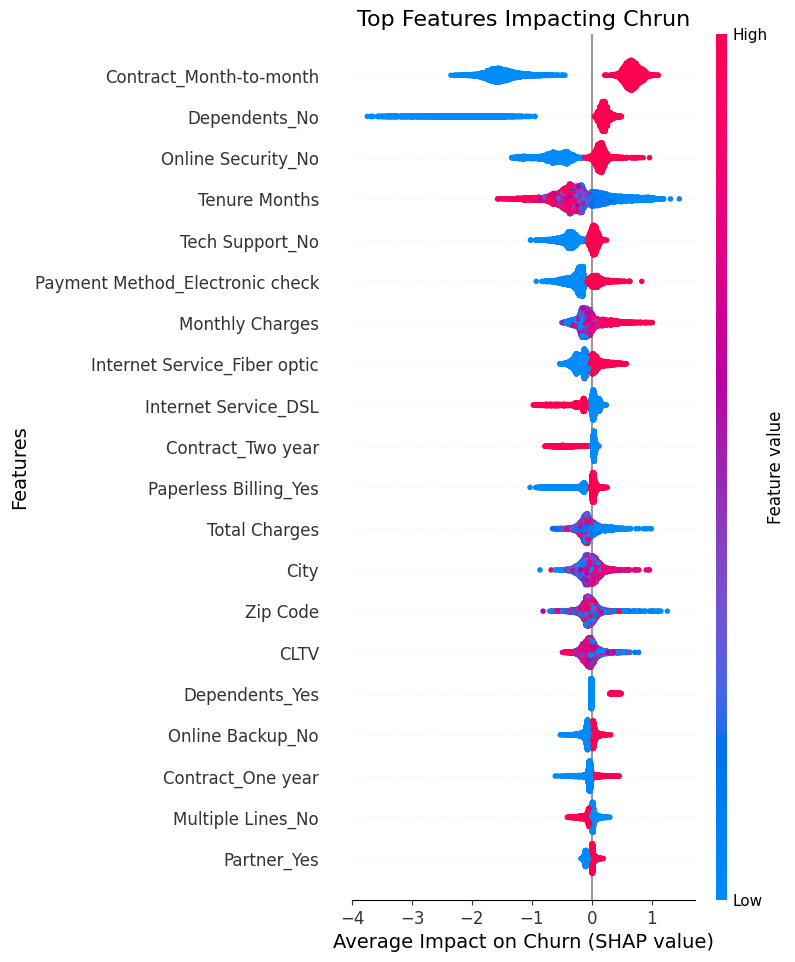

In [408]:
# Generate the SHAP summary plot
shap.summary_plot(shap_values, x, show=False)

# Customize title and labels
plt.title("Top Features Impacting Chrun", fontsize=16)  # Custom title
plt.xlabel("Average Impact on Churn (SHAP value)", fontsize=14)  # Custom x-axis label
plt.ylabel("Features", fontsize=14)  # Custom y-axis label

# Optionally adjust tick labels or add styling
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

In [409]:
import pickle

with open('rf_model.pkl', 'wb') as file:
    pickle.dump(random_forest, file)

with open('xg_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

In [410]:
# # Load the model from the pickle file
# with open('model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)

# print("Model loaded successfully!")